In [1]:
library(AUCell)
library(GEOquery)
library(data.table)
library(Matrix)
library(GSEABase)
library(NMF)
library(DT)
library(Rtsne)
library(Seurat)
library(ggplot2)
library(dplyr)
library(gridExtra)

Warning message:
“package ‘AUCell’ was built under R version 4.3.2”
Warning message:
“package ‘GEOquery’ was built under R version 4.3.2”
Loading required package: Biobase

Warning message:
“package ‘Biobase’ was built under R version 4.3.3”
Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory mate

In [6]:
# Read Dataset
obj <- readRDS("/users/PAS2713/kalebvoight22/Brase_Neurons.rds")

In [7]:
# Update Dataset
obj <- UpdateSeuratObject(obj)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap_4’

Updating matrix keys for DimReduc ‘umap_5’

Updating matrix keys for DimReduc ‘umap_6’

Updating matrix keys for DimReduc ‘umap_7’

Updating matrix keys for DimReduc ‘umap_8’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in SCT

Updating slots in pca

Updating slots in umap_4

Setting umap_4 DimReduc to global

Updating slots in umap_5

Setting umap_5 DimReduc to global

Updating slots in umap_6

Setting umap_6 DimReduc to global

Updating slots in umap_7

Setting umap_7 DimReduc to global

Updating slots in umap_8

Setting umap_8 DimReduc to global

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for SCTransform.RNA to RNA

Setting assay used for Fi

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,Sample_ID,Gender,PS1,PMI,⋯,RORB_Per_Inhib,TAFA2_Exp_All,TAFA2_Exp_Excite,TAFA2_Exp_Inhib,NEGR1_Exp_All,NEGR1_Exp_Excite,NEGR1_Exp_Inhib,RORB_Exp_All,RORB_Exp_Excite,RORB_Exp_Inhib
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
sample6_GCCCGAACACGTGTGC,p10040,9255,3076,6.8935710,6681,3018,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,Yes,Yes,0
sample6_AATCACGGTGCCGAAA,p10040,9249,3146,8.5522759,6676,3092,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,Yes,Yes,0
sample6_GTGATGTCAGGTGTTT,p10040,9151,3102,4.3273959,6708,3060,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,No,No,0
sample6_GAGAGGTCAATTTCGG,p10040,9061,3106,3.0901666,6703,3071,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,No,No,0
sample6_CTTCCGATCACACCCT,p10040,8999,2969,0.6334037,6700,2941,sample6,2,0,1.95,⋯,5.454545,No,No,0,Yes,Yes,0,No,No,0
sample6_TCATGTTGTGTAGTGG,p10040,8928,3157,3.5282258,6760,3114,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,No,No,0
sample6_GACCAATGTGCCCAGT,p10040,8940,3062,4.2058166,6693,3021,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,Yes,Yes,0
sample6_CCACTTGAGGTACCTT,p10040,8893,3149,5.5661756,6691,3121,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,Yes,Yes,0
sample6_CCTCCAATCTACGGTA,p10040,8800,3139,3.3636364,6717,3117,sample6,2,0,1.95,⋯,5.454545,Yes,Yes,0,Yes,Yes,0,Yes,Yes,0


In [401]:
# Subset Seurat object to include only control samples (Status == "Neuro_CO")
control_obj <- subset(obj, subset = Status == "Neuro_CO")

# Extract the count data for the control samples
DATA <- control_obj@assays$RNA$counts

# Extract the sample identifiers (before the '_')
sample_ids <- sub("_.*", "", colnames(DATA))

# Get the unique sample identifiers
unique_samples <- unique(sample_ids)

# Print unique sample identifiers
print(unique_samples)

[1] "sample15" "sample19" "sample24" "sample1"  "sample31" "sample7"  "sample36"
[8] "sample35" "sample29"


In [402]:
## Creating Gene Sets

# Checks if gene names exist in object
gene_expression <- FetchData(obj, vars = L23)
head(gene_expression)

,IQCJ-SCHIP1,CHN1,R3HDM1,FAM19A1,CABP1,LDB2,KCNIP4,PRKCB,DLGAP2,KCNQ5,⋯,SATB2,NSF,CBLN2,MLIP,CHRM3,PHACTR1,FSTL4,KALRN,KIAA1549L,RGS6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample6_GCCCGAACACGTGTGC,2.708050,0.6931472,1.098612,2.484907,0.0000000,1.945910,3.828641,2.564949,1.609438,3.2580965,⋯,1.9459101,0.0000000,1.9459101,0.000000,1.609438,3.135494,1.3862944,2.639057,0.000000,2.639057
sample6_AATCACGGTGCCGAAA,3.044522,1.0986123,2.890372,2.197225,1.6094379,1.791759,4.634729,2.079442,2.302585,3.3322045,⋯,1.3862944,1.0986123,1.3862944,1.609438,2.302585,2.397895,0.0000000,2.890372,0.000000,1.791759
sample6_GTGATGTCAGGTGTTT,0.000000,1.6094379,1.386294,1.945910,0.6931472,1.791759,4.174387,1.791759,1.098612,2.7080502,⋯,0.6931472,0.0000000,2.0794415,1.386294,2.484907,2.708050,0.0000000,2.564949,0.000000,0.000000
sample6_GAGAGGTCAATTTCGG,0.000000,1.7917595,2.079442,1.098612,1.6094379,2.397895,4.615121,2.079442,1.791759,2.3978953,⋯,0.6931472,0.0000000,0.6931472,1.098612,0.000000,2.833213,0.6931472,2.833213,0.000000,0.000000
sample6_CTTCCGATCACACCCT,2.197225,0.6931472,1.609438,1.386294,1.0986123,2.484907,3.784190,1.945910,2.079442,3.3322045,⋯,0.0000000,1.3862944,0.0000000,1.386294,2.833213,2.484907,1.0986123,2.639057,1.386294,0.000000
sample6_TCATGTTGTGTAGTGG,3.891820,0.0000000,2.890372,3.295837,1.7917595,1.945910,3.784190,2.302585,2.302585,0.6931472,⋯,0.0000000,0.6931472,0.0000000,1.945910,1.609438,3.258097,1.6094379,2.564949,1.098612,1.098612


In [403]:
# L2/3 gene set
L23 <- c("IQCJ-SCHIP1", "CHN1", "R3HDM1", "FAM19A1", "CABP1", "LDB2", "KCNIP4", "PRKCB", 
         "DLGAP2", "KCNQ5", "LINC01250", "FAM19A2", "SATB2", "NSF", "CBLN2", "MLIP", 
         "CHRM3", "PHACTR1", "FSTL4", "KALRN", "KIAA1549L", "RGS6")
geneSet23 <- GeneSet(L23, setName="L23_Set")

In [404]:
# L4
L4 <- c("IQCJ-SCHIP1", "RORB", "FAM19A2", "IL1RAPL2", "FSTL4", "PTPRT", "POU6F2", "KCNIP4",
        "TSHZ2", "KHDRBS3", "KCNH1", "PTPRD", "CPNE4", "R3HDM1", "CAMK1D", "SATB2", "KHDRBS2", 
        "SLC22A10")
geneSet4 <- GeneSet(L4, setName="L4_Set")

In [405]:
# L5
L5 <- c("FAM19A1", "CABP1", "KCNN2", "PEX5L", "HOMER1", "LDB2", "FAT3", "IQSEC1", "KCNIP4", 
        "TOX", "CBLN2", "LMO7", "ROBO2", "PTCHD1-AS", "KHDRBS3", "CNTN3", "ASIC2", "FAM189A1", 
        "PDE1C", "RIT2", "SORCS1", "COL24A1", "R3HDM1", "FAM135B", "RAPGEF5")
geneSet5 <- GeneSet(L5, setName="L5_Set")

In [406]:
# L6
L6 <- c("CABP1", "PDZRN4", "ZNF804B", "CHN1", "SATB2", "IQCJ-SCHIP1", "AK5", "TMEM132D", 
        "CCK", "DLGAP2", "KCNIP4", "CLSTN2", "POU6F2", "NELL1", "CDH12", "ATP2B1", 
        "CHRM3", "KALRN", "SV2B")
geneSet6 <- GeneSet(L6, setName="L6_Set")

In [407]:
# Combine all GeneSets into a GeneSetCollection
geneSetsCollection <- GeneSetCollection(c(geneSet23, geneSet4, geneSet5, geneSet6))

In [408]:
# Verifying all genes in gene set are located in the data
geneSetsCollection <- subsetGeneSets(geneSetsCollection, rownames(DATA))

In [409]:
# Verifies and displays correct gene sets
cbind(nGenes(geneSetsCollection))

L23_Set,22
L4_Set,18
L5_Set,25
L6_Set,19


In [410]:
# Appends number of genes in each gene set for easy viewing "geneset1 (50g)"
geneSets <- setGeneSetNames(geneSetsCollection, newNames=paste(names(geneSetsCollection), " (", nGenes(geneSetsCollection) ,"g)", sep=""))

In [411]:
# Sets reproducible seed for random gene sets
set.seed(222)

In [412]:
# Creates two random gene sets and combines them into a vector
extraGeneSets <- c(
  GeneSet(sample(rownames(DATA), 50), setName="Random (50g)"),
  GeneSet(sample(rownames(DATA), 500), setName="Random (500g)"))

In [413]:
# Finds number of cells with non-zero expression
countsPerGene <- apply(DATA, 1, function(x) sum(x>0))

In [414]:
# Identifies and stores highly expressed (top 5%) house keeping genes
extraGeneSets <- c(extraGeneSets,
                   GeneSet(sample(names(countsPerGene)[which(countsPerGene>quantile(countsPerGene, probs=.95))], 100), setName="HK-like (100g)"))

In [415]:
# Combines and displays all gene sets
geneSets <- GeneSetCollection(c(geneSets,extraGeneSets))
names(geneSets)

[1] "L23_Set (22g)"  "L4_Set (18g)"   "L5_Set (25g)"   "L6_Set (19g)"  
[5] "Random (50g)"   "Random (500g)"  "HK-like (100g)"

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 947.00 1140.80 1400.75 1748.00 2811.50 4187.00 


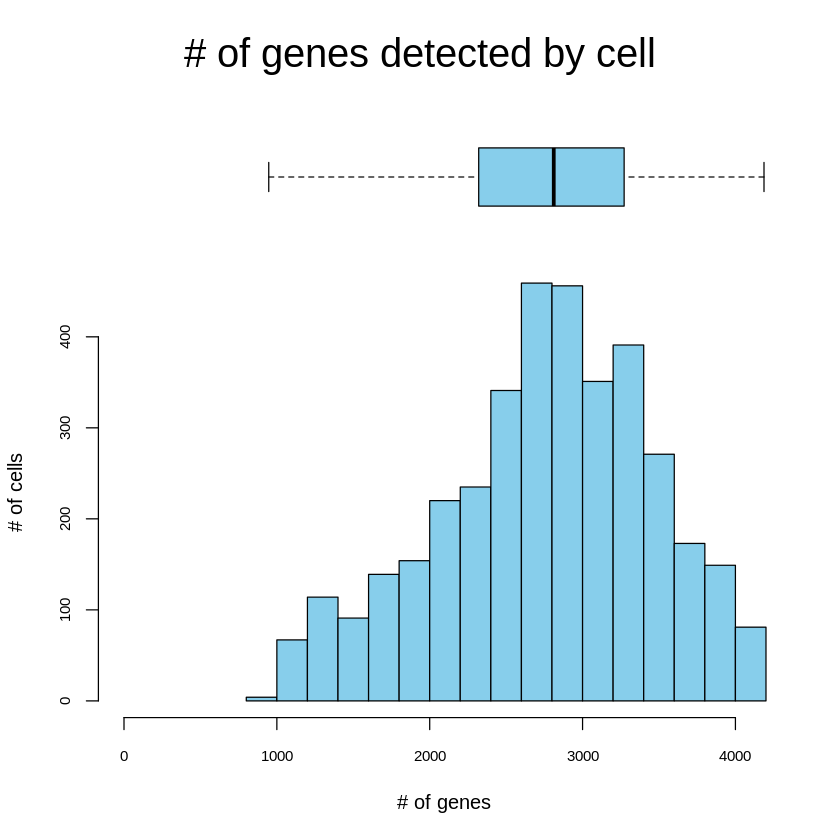

In [416]:
# Calculates rankings/scores
cells_rankings <- AUCell_buildRankings(DATA, plotStats=TRUE)
cells_AUC <- AUCell_calcAUC(geneSets, cells_rankings)

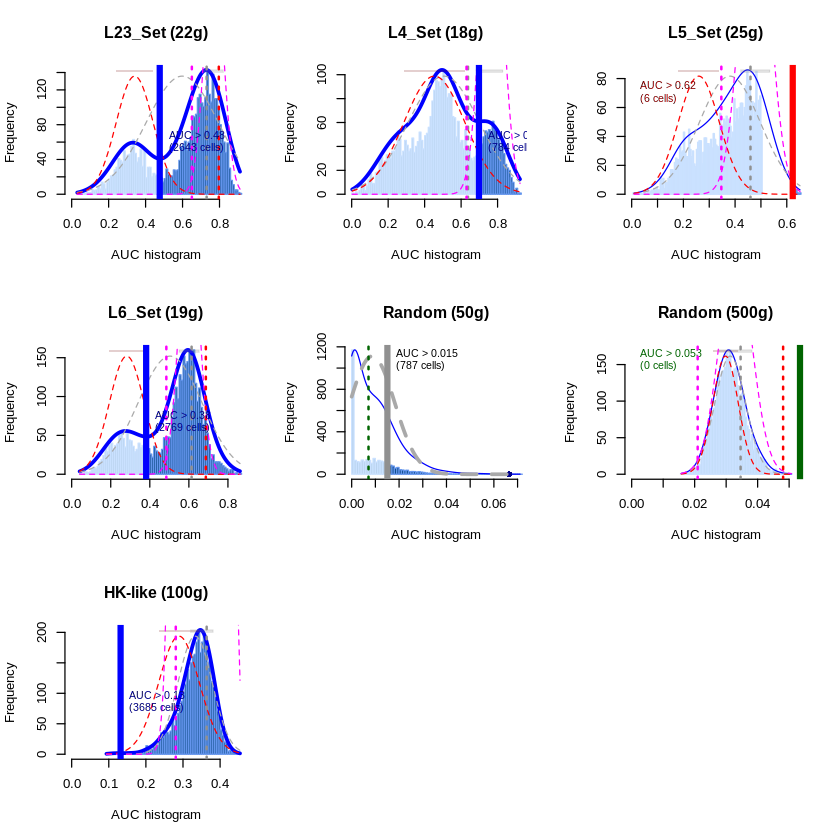

In [417]:
# Sets 3x3 grid for multi-plot display
par(mfrow=c(3,3)) 

# Creates histograms of cells for each gene set and assigns them as active/inactive. 
# Histograms are used to find custom threshold
cells_assignment <- AUCell_exploreThresholds(cells_AUC, plotHist=TRUE, assign=TRUE) 

In [418]:
# Selects oligo gene set
geneSetName <- rownames(cells_AUC)[grep("L23_Set", rownames(cells_AUC))]

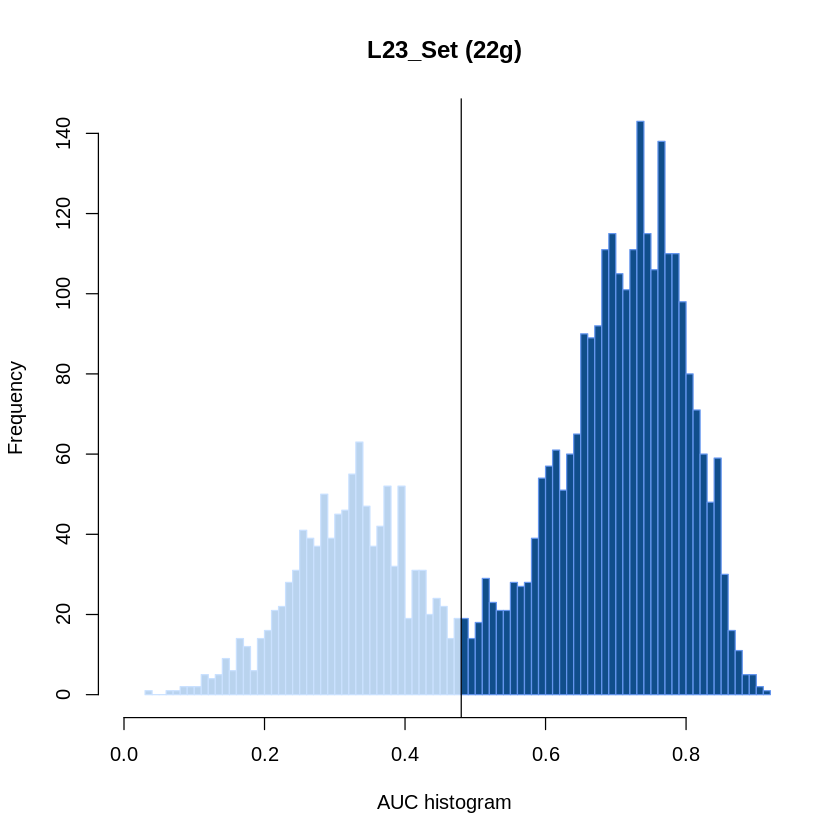

In [419]:
# Plots histogram of selected gene set and adds threshold line for easier visualization
AUCell_plotHist(cells_AUC[geneSetName,], aucThr=0.48)
abline(v=0.48)

In [249]:
# Extracts cell assignments into a list
cellsAssigned <- lapply(cells_assignment, function(x) x$assignment)

In [250]:
# Converts list to data frame
assignmentTable <- reshape2::melt(cellsAssigned, value.name="cell")

In [251]:
# Sets column 2 to corresponding geneset names
colnames(assignmentTable)[2] <- "geneSet"
head(assignmentTable)

,cell,geneSet
,<chr>,<chr>
1,sample15_GCTCAAATCGAAACAA,L23_Set (22g)
2,sample15_TGGGTTATCGAACGGA,L23_Set (22g)
3,sample15_AGAAGCGGTCCACTCT,L23_Set (22g)
4,sample15_TTGGGTAGTTTCACAG,L23_Set (22g)
5,sample15_ATGACCACACGCTTAA,L23_Set (22g)
6,sample15_ACTCTCGCATGTTACG,L23_Set (22g)


In [252]:
# Creates matrix depicting if a cell is apart of a geneset ("0", "1")
assignmentMat <- table(assignmentTable[,"geneSet"], assignmentTable[,"cell"])
# Displays first 2 columns
assignmentMat[,1:2]

                
                 sample1_AAAGGGCGTAGCTTAC sample1_AATTTCCTCGGTAGAG
  HK-like (100g)                        1                        1
  L23_Set (22g)                         0                        0
  L4_Set (18g)                          0                        0
  L5_Set (18g)                          0                        0
  L6_Set (19g)                          0                        0
  Random (50g)                          0                        0

In [253]:
# Ensure you sample no more rows and columns than exist in the matrix
num_rows <- nrow(assignmentMat)
num_cols <- ncol(assignmentMat)

In [259]:
# Sample 50 random columns and rows for heatmaps (prevents from large overcomplicated heatmaps)
miniAssigMat <- assignmentMat[sample(1:num_rows, min(25, num_rows)), sample(1:num_cols, min(25, num_cols))]

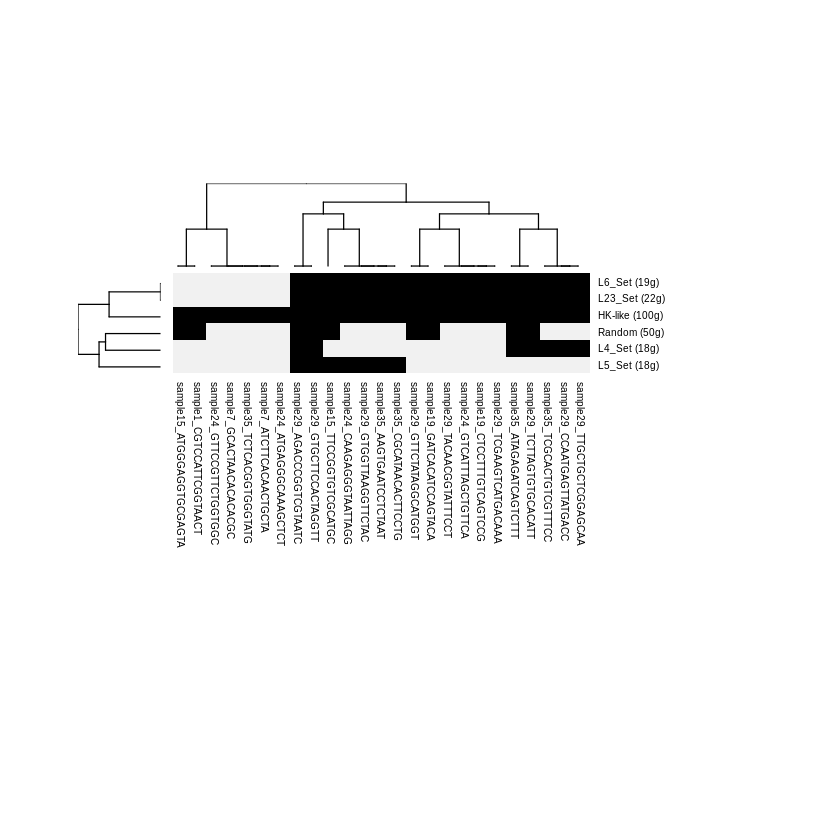

In [260]:
# Creates heatmap from randomly selected cells
aheatmap(miniAssigMat, scale="none", color="black", legend=FALSE, cellwidth=10, cellheight=10)

In [258]:
# Creates useful data table with search option
datatable(assignmentTable, options = list(pageLength = 10), filter="top")

HTML widgets cannot be represented in plain text (need html)